MA311M Scientific Computing Assignment 2 - Animesh Tiwari, 180104013


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from numpy.linalg import inv
%matplotlib inline

In [65]:
"""
Question 1
"""
# Runge's Example using lagrange
def lagrange(xp,x, y):
  yp = 0
  n = 8
  for i in range(n):
    p = 1
    for j in range(n):
      if i!=j:
        p = p * (xp-x[j])/(x[i] - x[j])
    
    yp = yp + p * y[i]
  return yp  

In [66]:
def func(x):
  return 1/(1+x*x)

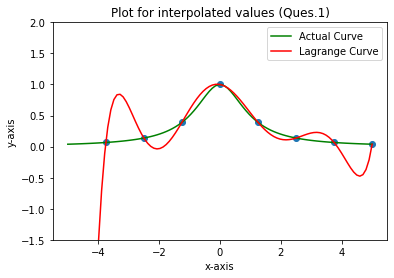

In [67]:
x = np.zeros((8))
y = np.zeros((8))
for i in range(1,9):
  x[i-1] = -5 + (10*i)/8
  y[i-1] = func(x[i-1])

x_graph = np.linspace(-5,5,100)
y_orig = func(x_graph)
y_lagr = lagrange(x_graph, x, y)
plt.plot(x_graph, y_orig,color = 'green' , label = 'Actual Curve')
plt.plot(x_graph, y_lagr,color = 'red' , label = 'Lagrange Curve')
plt.scatter(x, y)
plt.legend(loc = 'best')
plt.ylim([-1.5,2.0])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Plot for interpolated values (Ques.1)')
plt.savefig('plot_1.pdf')
plt.show()

50


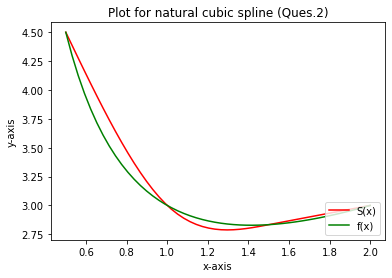

In [68]:
"""
Question 2
"""
def f2(x):
    return x + 2/x

n = 3
xis_2 = ((1.0/2.0) * np.arange(1,5)).reshape(-1,1)
fis_2 = f2(xis_2).reshape(-1,1)

his = xis_2[1:n+1] - xis_2[0:n]
uis = 2 * (his[1:n] + his[0:n-1])
bis = 6 * (fis_2[1:n+1] - fis_2[0:n])/his
vis = bis[1:n] - bis[0:n-1]
A = [
    [uis[0], his[1]],
    [his[1], uis[1]]
    ]
A = np.array(A).reshape(2,2)
A_inv = np.linalg.inv(A)
mis = np.dot(A_inv, vis)
zs = np.zeros((4,1))
zs[1:3] = mis
mis = zs
#print(A_inv, mis,  vis)
def Si(x, i):
    val = (mis[i]/(6*his[i])) * ((xis_2[i+1]-x)**3) + \
          (mis[i+1]/(6*his[i])) * ((x-xis_2[i])**3) + \
          (fis_2[i+1]/his[i] - (mis[i+1]*his[i])/6.0) * (x - xis_2[i]) + \
          (fis_2[i]/his[i] - (mis[i]*his[i])/6.0) * (xis_2[i+1] - x)
    return val

plot_xs_2 = np.linspace(0.5, 2, 50)
plot_fxs_2 = f2(plot_xs_2)

plot_pxs_2 = []
for x in plot_xs_2:
    for i in range(3):
        if (xis_2[i] <= x and xis_2[i+1] >= x ):
            plot_pxs_2.append(Si(x,i))
            break

print(len(plot_pxs_2))            

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(plot_xs_2, plot_pxs_2, 'r', label = 'S(x)')
plt.plot(plot_xs_2, plot_fxs_2, 'g', label = 'f(x)')
plt.title('Plot for natural cubic spline (Ques.2)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='lower right')
plt.savefig("plot_2.pdf")
plt.show()